In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [142]:
pred_metadata = pd.read_pickle('pred_metadata.pckl')

In [44]:
pred_metadata.head()

,class_id,polygon_id,class_name,local_auth,site_code,site_name,address,east,north,site_size,site_type,location,owner_1,owner_2,period,previous_u,developmen,geometry
0,2,92,bare soil,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
1,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
2,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
3,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
4,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."


In [3]:
df_vacant = pred_metadata[pred_metadata['site_type'] == 'Vacant Land']
df_derelict = pred_metadata[pred_metadata['site_type'] == 'Derelict']


In [8]:
df_vacant.head()

,class_id,polygon_id,class_name,local_auth,site_code,site_name,address,east,north,site_size,site_type,location,owner_1,owner_2,period,previous_u,developmen,geometry
28,0,346,vegetation,Glasgow City,3545,None,SKERRAY STREET/ CATHAY STREET,259321,669885,0.79,Vacant Land,Site in settlement with population equal to or...,Private: Other,Not applicable (i.e. only one owner),2001-2004,Residential - Housing,Developable - Short Term,"POLYGON ((259271.897 669945.327, 259302.324 66..."
29,0,346,vegetation,Glasgow City,3545,None,SKERRAY STREET/ CATHAY STREET,259321,669885,0.79,Vacant Land,Site in settlement with population equal to or...,Private: Other,Not applicable (i.e. only one owner),2001-2004,Residential - Housing,Developable - Short Term,"POLYGON ((259271.897 669945.327, 259302.324 66..."
30,0,346,vegetation,Glasgow City,3545,None,SKERRAY STREET/ CATHAY STREET,259321,669885,0.79,Vacant Land,Site in settlement with population equal to or...,Private: Other,Not applicable (i.e. only one owner),2001-2004,Residential - Housing,Developable - Short Term,"POLYGON ((259271.897 669945.327, 259302.324 66..."
31,0,346,vegetation,Glasgow City,3545,None,SKERRAY STREET/ CATHAY STREET,259321,669885,0.79,Vacant Land,Site in settlement with population equal to or...,Private: Other,Not applicable (i.e. only one owner),2001-2004,Residential - Housing,Developable - Short Term,"POLYGON ((259271.897 669945.327, 259302.324 66..."
32,0,346,vegetation,Glasgow City,3545,None,SKERRAY STREET/ CATHAY STREET,259321,669885,0.79,Vacant Land,Site in settlement with population equal to or...,Private: Other,Not applicable (i.e. only one owner),2001-2004,Residential - Housing,Developable - Short Term,"POLYGON ((259271.897 669945.327, 259302.324 66..."


Text(0, 0.5, 'Percentage')

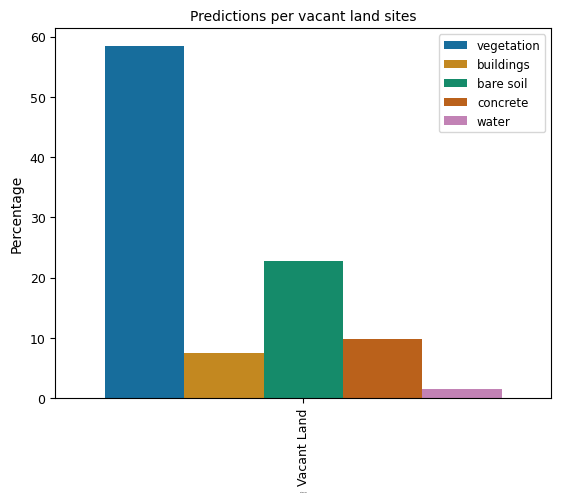

In [7]:
plt.style.use('default')
grouped = df_vacant.groupby(['class_name'], sort=False)
site_type_counts = grouped['site_type'].value_counts(normalize=False, sort=False)


site_type_data = [
    {'site_type': site_type, 'class_name': class_name, 'percentage': percentage/len(df_vacant)*100} for 
    (class_name, site_type), percentage in dict(site_type_counts).items()
]

df_site = pd.DataFrame(site_type_data)

p = sns.barplot(x='site_type', y="percentage", hue="class_name", data=df_site, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 

plt.legend(prop={'size': 8.5})
plt.title('Predictions per vacant land sites', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)

Text(0, 0.5, 'Percentage')

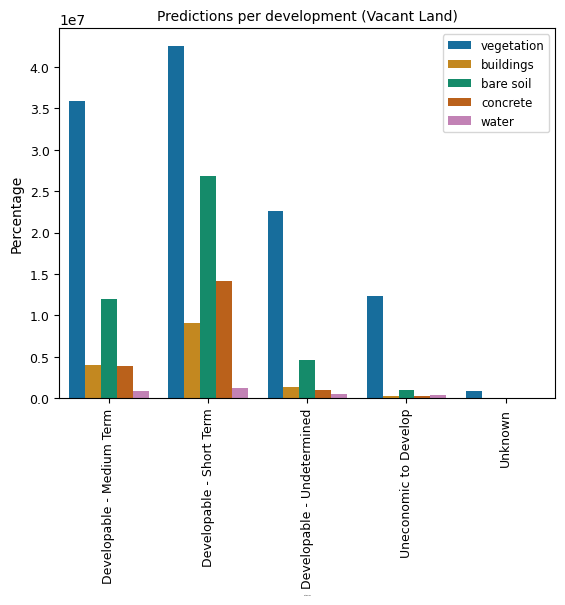

In [8]:
df_vacant = df_vacant.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
df_vacant = df_vacant.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')

grouped = df_vacant.groupby(['class_name'], sort=False)
development_counts = grouped['developmen'].value_counts(normalize=False, sort=False)

development_data = [
    {'developmen': developmen, 'class_name': class_name, 'percentage': percentage*100} for 
    (class_name, developmen), percentage in dict(development_counts).items()
]

df_development = pd.DataFrame(development_data)

p = sns.barplot(x='developmen', y="percentage", hue="class_name", data=df_development, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 
plt.legend(prop={'size': 8.5})
plt.title('Predictions per development (Vacant Land)', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)



In [41]:
df_vacant = df_vacant.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
df_vacant = df_vacant.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')

p = df_vacant.groupby(['class_name', 'developmen']).size().sort_values(ascending=False).reset_index(name='count')

percentage = [0.453,0.633,0.285, 0.753, 0.151, 0.868, 0.211, 0.097, 0.154, 0.0715, 0.069, 0.0438, 0.0129, 0.069, 0.0306, 0.945, 0.014, 0.0173, 0.0254, 0.0218, 0.0144, 0.0228, 0.0156, 0.0117, 0.0038]

p['percentage'] = percentage
p

,class_name,developmen,count,percentage
0,vegetation,Developable - Short Term,425304,0.4530
1,vegetation,Developable - Medium Term,359307,0.6330
2,bare soil,Developable - Short Term,267850,0.2850
3,vegetation,Developable - Undetermined,226169,0.7530
4,concrete,Developable - Short Term,141932,0.1510
5,vegetation,Uneconomic to Develop,123132,0.8680
6,bare soil,Developable - Medium Term,119852,0.2110
7,buildings,Developable - Short Term,91124,0.0970
8,bare soil,Developable - Undetermined,46335,0.1540
9,buildings,Developable - Medium Term,40550,0.0715


Text(0, 0.5, 'Percentage')

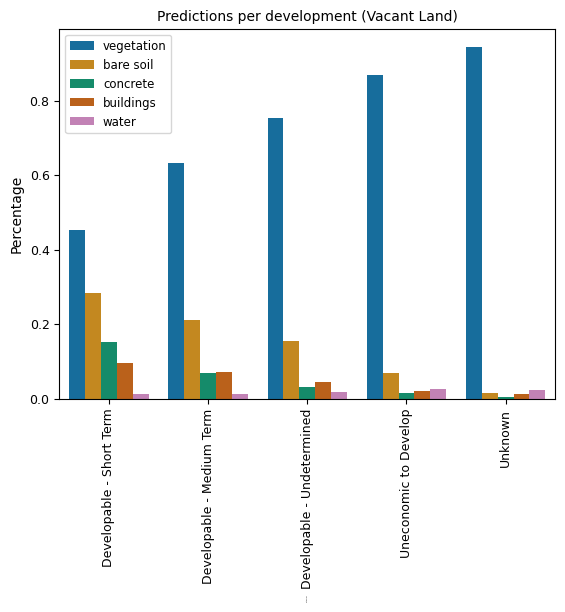

In [42]:
plt.style.use('default')
plot = sns.barplot(x='developmen', y="percentage", hue="class_name", data=p, palette='colorblind')
plt.setp(plot.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(plot.get_yticklabels(), fontsize=9) 
plt.legend(prop={'size': 8.5})
plt.title('Predictions per development (Vacant Land)', fontsize=10)
plt.xlabel('Categories', fontsize=0, rotation=90)
plt.ylabel('Percentage', fontsize=10)

In [24]:
df_vacant.groupby(['class_name', 'site_size', 'period']).size().groupby('class_name').mean()

class_name
bare soil     2037.009174
buildings      682.175115
concrete       902.971831
vegetation    5242.715596
water          145.721393
dtype: float64

In [54]:
period_vacant = df_vacant.groupby(['site_size', 'period']).size().groupby('period').sum()
period_derelict = df_derelict.groupby(['site_size', 'period']).size().groupby('period').sum()
priods = pd.DataFrame(period_vacant, period_derelict)
#period_derelict = pd.DataFrame(period_derelict)

period
1980 or earlier    1779794
1981-1985           818473
1986-1990           332825
1991-1995           376372
1996-2000           819700
2001-2004           309170
2005                 57564
2006                103981
2007                219142
2008                346591
2009                107587
2010                 94090
2011                 48072
2012                 20675
2013                257019
2014                 65065
2015                 44070
2016                 35966
2017                 11610
dtype: int64

In [182]:
period_vacant

period
1980 or earlier    312528
1981-1985          181247
1986-1990          145027
1991-1995          229071
1996-2000          340552
2001-2004          156281
2005                19098
2006               100182
2007                58228
2008               214782
2009                43489
2010                30256
2011                13877
2012                 7780
2013                76523
2014                19954
2015                 2429
2017                 5331
dtype: int64

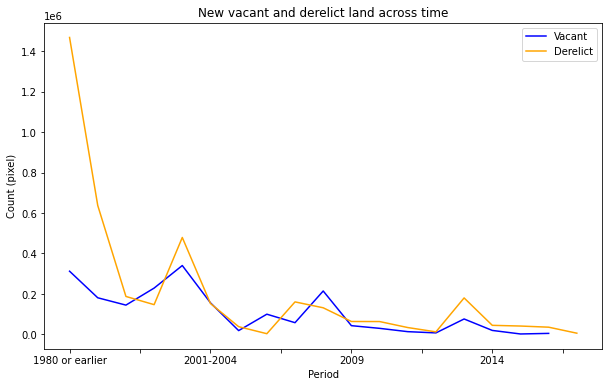

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

p1 = period_vacant.plot(color= 'blue', label= 'Vacant')
p2 = period_derelict.plot(color = 'orange', label='Derelict')
#plt.legend()
ax.set_title('New vacant and derelict land across time')
plt.xlabel('Period')
plt.ylabel('Count (pixel)')
plt.legend()

In [33]:
df_vacant.groupby(['site_size', 'period'])['class_name'].sum()

site_size  period         
0.1        1980 or earlier    concretebare soilconcretebuildingsbuildingsbar...
           1996-2000          vegetationbuildingsbuildingsvegetationvegetati...
           2007               vegetationvegetationvegetationvegetationvegeta...
           2008               buildingsconcretebare soilbare soilconcretecon...
           2010               vegetationvegetationvegetationvegetationvegeta...
                                                    ...                        
3.59       1986-1990          vegetationvegetationvegetationvegetationvegeta...
5.16       2008               vegetationvegetationvegetationvegetationvegeta...
7.17       1991-1995          concreteconcreteconcreteconcretebare soilbuild...
7.78       1980 or earlier    concreteconcretebuildingsbuildingsbuildingsbui...
8.52       1996-2000          vegetationwatervegetationvegetationvegetationb...
Name: class_name, Length: 219, dtype: object

In [67]:
grouped = pred_metadata.groupby(['class_name'], sort=False)
previous_u_counts = grouped['previous_u'].value_counts(normalize=True, sort=False)

previous_u_data = [
    {'previous_u': previous_u, 'class_name': class_name, 'percentage': percentage*100} for 
    (class_name, previous_u), percentage in dict(previous_u_counts).items()
]

df_previous_u = pd.DataFrame(previous_u_data)

In [89]:
pred_metadata['previous_u'].unique()

array(['Manufacturing', 'Residential - Housing', 'Unknown', 'Education',
       'Recreation & leisure (excluding passive open space)', 'Other',
       'Agriculture', 'Transport', 'Retailing', 'Passive Open Space',
       'Storage', 'Community & Health',
       'Residential - Hotels, Hostels etc', 'Other General Industrial',
       'Utility Services', 'Business Class', 'Forestry/Woodland',
       'Wholsesale distribution', 'Offices'], dtype=object)

In [92]:
pred_metadata = pred_metadata.replace({'previous_u':'Recreation & leisure (excluding passive open space)'}, 'Recreation & leisure')
previous_use = pred_metadata[['previous_u', 'class_name', 'class_id']].groupby(['class_name', 'previous_u']).count().reset_index().pivot(index='previous_u', columns='class_name', values='class_id')
previous_use.columns


Index(['bare soil', 'buildings', 'concrete', 'vegetation', 'water'], dtype='object', name='class_name')

Text(0.5, 1.0, 'Previous use of vacant and derelict sites')

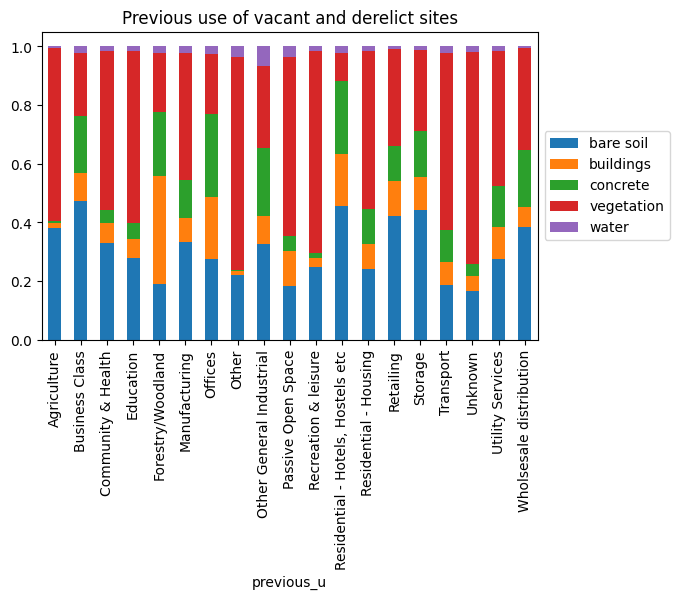

In [98]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot()

pixel_sum = previous_use['bare soil'] + previous_use['buildings'] + previous_use['vegetation'] + previous_use['water'] + previous_use['concrete']
previous_use.div(pixel_sum, axis=0).plot(kind='bar', stacked=True, ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Previous use of vacant and derelict sites')

Text(0.5, 1.0, 'Development categories of vacant and derelict sites')

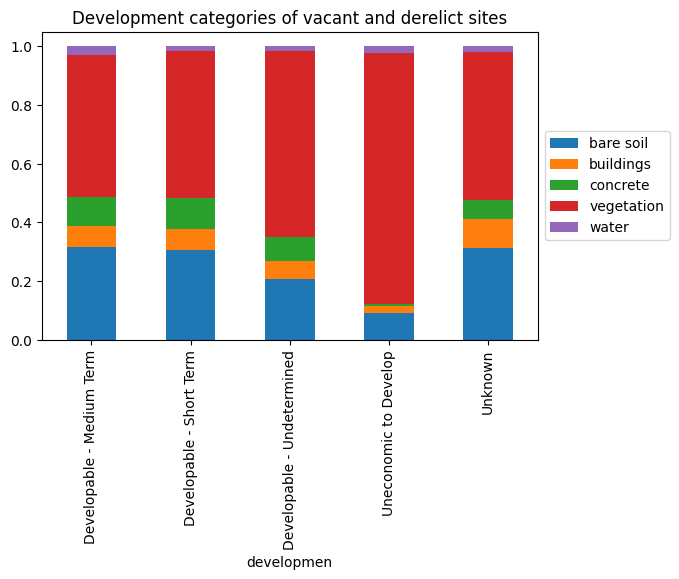

In [99]:
pred_metadata = pred_metadata.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
pred_metadata = pred_metadata.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')

development_subset = pred_metadata[['developmen', 'class_name', 'class_id']].groupby(['class_name', 'developmen']).count().reset_index().pivot(index='developmen', columns='class_name', values='class_id')


fig = plt.figure(figsize=(8, 4))
ax = plt.subplot()

pixel_sum = development_subset['bare soil'] + development_subset['buildings'] + development_subset['vegetation'] + development_subset['water'] + development_subset['concrete']
development_subset.div(pixel_sum, axis=0).plot(kind='bar', stacked=True, ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Development categories of vacant and derelict sites')



Text(0.5, 1.0, 'Time of classification and land cover type')

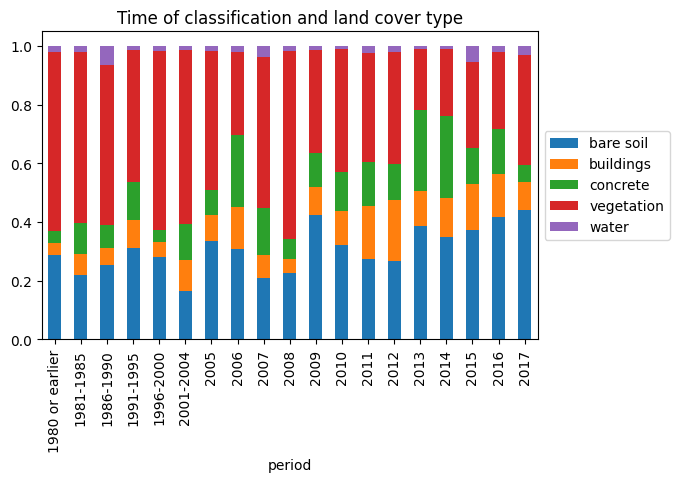

In [100]:
period_subset = pred_metadata[['period', 'class_name', 'class_id']].groupby(['class_name', 'period']).count().reset_index().pivot(index='period', columns='class_name', values='class_id')


fig = plt.figure(figsize=(8, 4))
ax = plt.subplot()

pixel_sum = period_subset['bare soil'] + period_subset['buildings'] + period_subset['vegetation'] + period_subset['water'] + period_subset['concrete']
period_subset.div(pixel_sum, axis=0).plot(kind='bar', stacked=True, ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Time of classification and land cover type')




Text(0.5, 1.0, 'Ownership and land cover type')

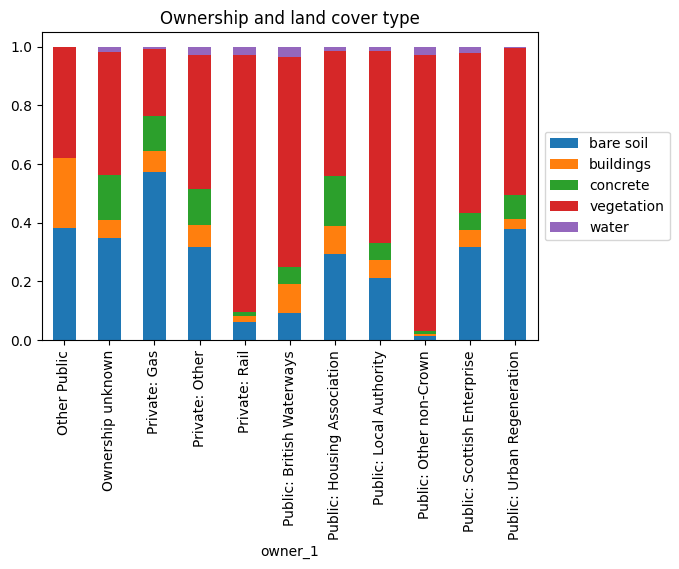

In [155]:
pred_metadata = pred_metadata.replace({'owner_1':'Private: Network Rail/ Rail Franchise Holder'}, 'Private: Rail')
pred_metadata = pred_metadata.replace({'owner_1':'Public: Other National/Local Government'}, 'Other Public')
pred_metadata = pred_metadata.replace({'owner_1':'Public: Urban Regeneration Company'}, 'Public: Urban Regeneration')


owner_subset = pred_metadata[['owner_1', 'class_name', 'class_id']].groupby(['class_name', 'owner_1']).count().reset_index().pivot(index='owner_1', columns='class_name', values='class_id').fillna(0)


fig = plt.figure(figsize=(8, 4))
ax = plt.subplot()

pixel_sum = owner_subset['bare soil'] + owner_subset['buildings'] + owner_subset['vegetation'] + owner_subset['water'] + owner_subset['concrete']
owner_subset_perc = owner_subset.div(pixel_sum, axis=0).plot(kind='bar', stacked=True, ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Ownership and land cover type')




In [161]:
owner_subset

class_name,bare soil,buildings,concrete,vegetation,water
owner_1,,,,,
Other Public,8.0,5.0,0.0,8.0,0.0
Ownership unknown,9057.0,1558.0,3982.0,10856.0,482.0
Private: Gas,163400.0,20570.0,34492.0,64930.0,2697.0
Private: Other,616002.0,145713.0,241587.0,889040.0,55506.0
Private: Rail,4235.0,1456.0,951.0,60013.0,1941.0
Public: British Waterways,2991.0,3274.0,1925.0,23651.0,1138.0
Public: Housing Association,132905.0,43574.0,76898.0,192380.0,6799.0
Public: Local Authority,582213.0,166519.0,153353.0,1790033.0,44702.0
Public: Other non-Crown,38.0,21.0,24.0,2542.0,76.0


In [179]:
pred_metadata['site_size'] = pred_metadata.site_size.astype('float')

In [180]:
print(pred_metadata.columns)
pred_metadata = pd.DataFrame(pred_metadata)
size_df = pred_metadata[['site_type', 'site_size']].groupby('site_type').mean()
#df_vacant.groupby(['site_size', 'site_type']).size().groupby('site_size').sum()
#size_df = pd.DataFrame(size_df)
#size_df.plot()

Index(['class_id', 'polygon_id', 'class_name', 'local_auth', 'site_code',
       'site_name', 'address', 'east', 'north', 'site_size', 'site_type',
       'location', 'owner_1', 'owner_2', 'period', 'previous_u', 'developmen',
       'geometry'],
      dtype='object')


In [181]:
size_df

,site_size
site_type,
Derelict,8.39825
Vacant Land,2.18655


In [198]:
polygons_metadata = pred_metadata.groupby('polygon_id').first()

In [202]:

uneconomic = polygons_metadata[polygons_metadata['developmen'] == 'Uneconomic to Develop/Soft End Use']
public_uneconomic = uneconomic[['site_size', 'owner_1']].groupby('owner_1').sum()
public_uneconomic 

,site_size
owner_1,
Ownership unknown,0.79
Private: Other,11.86
Private: Rail,2.49
Public: British Waterways,2.16
Public: Housing Association,0.39
Public: Local Authority,27.84
Public: Scottish Enterprise,2.65


In [241]:
recent_acquisition = polygons_metadata[polygons_metadata['period'] == '2013']
recent_acquisition_type = recent_acquisition[['site_size', 'owner_1']].groupby('owner_1').sum()
recent_acquisition_type 

,site_size
owner_1,
Private: Other,14.03
Public: Housing Association,8.36
Public: Local Authority,2.96
